In [7]:
# get frame 2203 + x from BadApple1261CirclesThickFill.mp4
import cv2
import numpy as np
import json
import matplotlib.pyplot as plt



In [4]:
cap = cv2.VideoCapture('videos/BadApple1261CirclesThickFillCentered.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES, 2203+30)
ret, frame = cap.read()
cv2.imwrite('frame2203.png', frame)

True

(-4.60040348, 4.4840245)
(4.2195965200000005, -1.1859755)
1920 1080


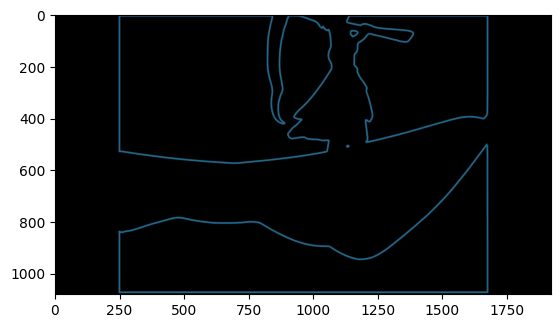

In [11]:
# open the file, create function to convert any coordinates from the original image to function coordinates
im = cv2.imread('frame2203.png')
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
top_left =  [-4.60040348,  4.4840245 ]                                        
bottom_right = [ 4.21959652, -1.1859755 ]
x_min = top_left[0]
x_max = bottom_right[0]
y_max = top_left[1]
y_min = bottom_right[1]
height, width, _ = im.shape
def convert_pic_coordinates_to_function_coordinates(x, y):
    x = x_min + (x / width) * (x_max - x_min)
    y = y_min + ((height -y) / height) * (y_max - y_min)
    return x, y

print(convert_pic_coordinates_to_function_coordinates(0, 0)) 
print(convert_pic_coordinates_to_function_coordinates(width, height)) 
print(width, height)

In [12]:
# work on a cropped version of the image, cropped from the bottom. This lets us find the first blue pixel from the bottom
im2 = im[:height-100, :]
# iterate over all xs, from the bottom, and find the first non-black pixel
coordinates = []
import json
for x in range(width):
    for y in range(height-100-1, 0, -1):
        if im2[y, x, 0] > 100:
            coordinates.append(convert_pic_coordinates_to_function_coordinates(x, y))
            break
# dump to a file
with open('coordinates.json', 'w') as f:
    json.dump(coordinates, f)

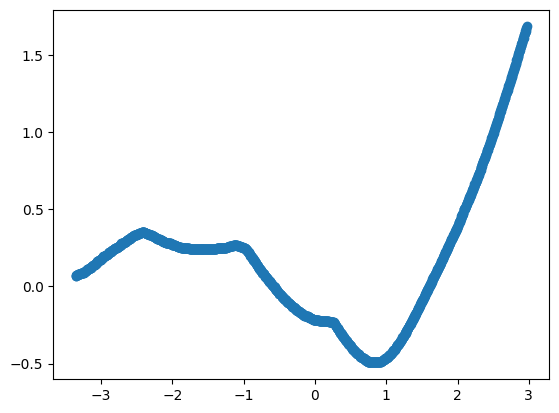

In [13]:
# plot the points
# try truncating some coordinates on the edges
coordinates = json.load(open('coordinates.json'))
coords_good = coordinates[25:-25]
x, y = zip(*coords_good)

plt.scatter(x, y)
plt.show()

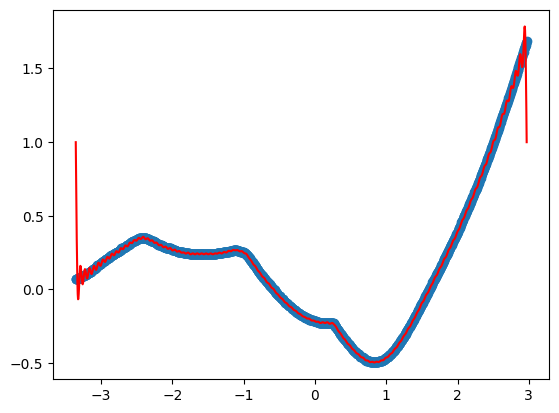

In [14]:
# make fourier series with various number of terms using the coordinates
terms = 100 # number of terms for the Fourier series

x, y = zip(*coords_good)
x = np.array(x)
y = np.array(y)
tau = (max(x)-min(x))

def cn(n):
    c = y*np.exp(-1j*2*n*np.pi*x/tau)
    return c.sum()/c.size

def f(x, Nh):
    f = np.array([2*cn(i)*np.exp(1j*2*i*np.pi*x/tau) if i !=0 else cn(i)*np.exp(1j*2*i*np.pi*x/tau) for i in range(0,Nh+1)])
    return f.sum()



y_Fourier_1 = np.array([f(t,terms).real for t in x])
plt.scatter(x, y)
plt.plot(x, y_Fourier_1, 'r')
